<a href="https://colab.research.google.com/github/sumedhvdatar/Datastructures/blob/master/Assignment3_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name.

In [0]:
NAME = "Sumedh Vilas Datar"

---

# Assignment Description
The purpose of this assignment is to gain some experience with multilayer and convolutional networks.
This assignment will be fairly open-ended, but I will give some general guidelines.

# Part 1 - Fully Connected Feed Forward Networks
Train a feedforward networks in python to perform a task of your choice. If you don't have anything in mind, you can do classification of some common datasets (MNIST, Fashion MNIST). You may find it interesting to use other datasets (faces, etc).

Please don't do anything simpler than this, unless it's interesting (a problem in your research, from your work, using a unique dataset).

You may use libraries for this assignment (tensorflow, keras, sklearn, etc). Please don't use other neural network libraries (pytorch, etc).

You may re-use code from previous assignment. You may follow some tutorial, but please some unique contribution (use a different dataset, for example).

# 1A - Preprocessing
Code that does any imports, data loading, preprocessing, normalization goes in the cell below. Please use only a single cell.

You may do this however you wish, but should follow the practices we learned in class (shuffling data, normalizing, etc).

If you want to experiment with some feature transformations, I would encourage it (just be careful of generating too many features).

In [3]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


170500096/170498071 [==============================] - 20s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


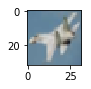

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(1,1))
plt.imshow(x_test[10],interpolation='nearest')
plt.show()

# 1B - Model definition
Create a fully connected feedforward network model. You can use whatever you want in terms of activation functions/architecture/etc.

However please make sure your architecture is compatible with the task you choose.

In [5]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))
 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 411,146
Trainable params: 411,146
Non-trainable params: 0
_________________________________________________________________


# 1C - Training
Train a single fully connected network for this task. If you do some kind of hyperparameter search, just include the best parameters in your submission.

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test),shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.9157 - acc: 0.3036 - val_loss: 1.8233 - val_acc: 0.3458
Epoch 2/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.7850 - acc: 0.3586 - val_loss: 1.7567 - val_acc: 0.3762
Epoch 3/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.7227 - acc: 0.3798 - val_loss: 1.7130 - val_acc: 0.3847
Epoch 4/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.6862 - acc: 0.3957 - val_loss: 1.6727 - val_acc: 0.3976
Epoch 5/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.6618 - acc: 0.4032 - val_loss: 1.6938 - val_acc: 0.3898
Epoch 6/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.6404 - acc: 0.4116 - val_loss: 1.6475 - val_acc: 0.4055
Epoch 7/50
50000/50000 [==============================] - 6s 129us/step - 

# 1D - Quantitative Evaluation
Do some quantitative evaluation of your trained model. At minimum you should report the accuracy on some withheld data. Plots would be preferable.

In [8]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 58us/step
Test loss: 1.497443363571167
Test accuracy: 0.4723


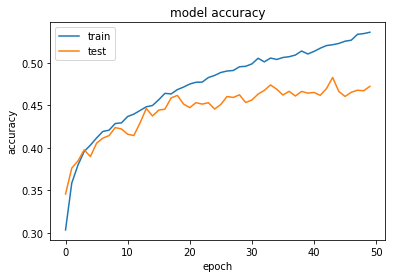

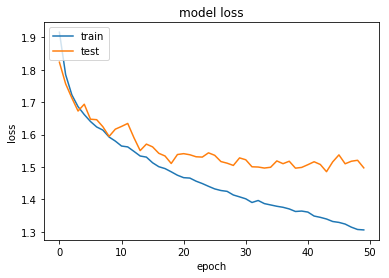

In [9]:
# summarize history for accuracy
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 1E - Qualitative Evaluation
Do some qualitative evaluation of your trained model. 

An example would be visualizing a small sample (10 or so) of images that were correctly classified from your validation data, and another sample of incorrectly classified samples.

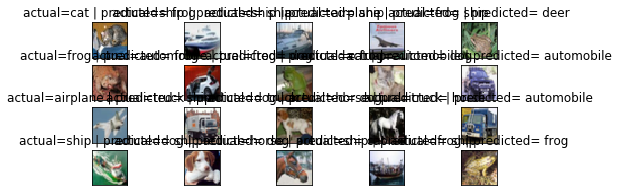

In [22]:
import numpy as np
import matplotlib.pyplot as plt
num_classes = 10
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(20):
    ax = fig.add_subplot(4, 5, 1 + i, xticks=[], yticks=[])
    index = np.argmax(y_test[i])
    predicted_label  = model.predict(x_test)[i]
    predicted_class = class_names[np.argmax(predicted_label)]
    ax.set_title("actual="+class_names[index]+" | predicted= "+predicted_class)
    plt.imshow(x_test[i],interpolation='nearest')
plt.show()

# 1F - Report
Write a few sentence summary of your work on part 1. It should answer the following questions:

1. What task were you trying to solve?
2. How did you implement it?
3. How did it perform? Did it do well? Overfit? Underfit?
4. Cite any resources/tutorials you used (informally, just a URL is ok). Citing papers isn't necessary.
5. This is meant to be a very simple summary (like the 'abstract' of a paper). No diagrams/etc necessary.

Solutions for all questions
------------------------------

Answer 1
-----------

The task I am trying to accomplish is to recognize objects in the image. I am using artificial neural network to perform classification on CIFAR-10 Dataset.

Answer 2
-----------

I am using Keras framework to build my neural network. The neural network has the following
architecture.

Flatten(input_shape=(32, 32, 3)))
Dense(128, activation='sigmoid'))
Dense(128, activation='sigmoid'))
Dense(10))
Activation('softmax'))

Two dense layers in the middle and sigmoid is the activation function to bring in non linearity in the network and allowing the neurons to learn more patterns.

Object Recogniton Pipeline

Training
----------

The CIFAR 10 dataset is of size 32*32 (RGB). The dataset is already preprocessed. This input dimension is fed into the neural network. Training of the neural network happens with the follwing  hyperparameters.

Hyperparameters : Epochs = 50,  Optimizer = Adam, Loss = Categorical cross entropy

Inference
-----------

Model.predict function helps us in making the prediction given an image. The model will generate values for each class and the index with highest probability is used to get the label.


Answer3: 
----------

The model did not perform well , from the graph we can see that the model is overfitting.

Here are the metrics on the test data :

Test loss: 1.497443363571167
Test accuracy: 0.4723

---------------------------------------------

# Part 2 - Advanced architectures (CNN/RNN)
In part 2 train an advanced architecture like a CNN to perform the same task from part 1. Please assume part 1 and 2 are run independently. So you may need to repeat code twice.

You do not need to do anything super fancy (don't try to train a 50 layer residual network, etc).

# 2A - Preprocessing
Code that does any imports, data loading, preprocessing, normalization goes in the cell below.

In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


170500096/170498071 [==============================] - 14s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


# 2B - Model definition
Create a fully connected feedforward network model. You can use whatever you want in terms of activation functions/architecture/etc.

However please make sure your architecture is compatible with the task you choose.

In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

# 2C - Training
Train a more advanced (CNN/RNN) for this task. If you do some kind of hyperparameter search, just include the best parameters in your submission.

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test),shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 16s 313us/step - loss: 1.7990 - acc: 0.3378 - val_loss: 1.5185 - val_acc: 0.4416
Epoch 2/100
50000/50000 [==============================] - 11s 212us/step - loss: 1.4877 - acc: 0.4604 - val_loss: 1.3760 - val_acc: 0.4985
Epoch 3/100
50000/50000 [==============================] - 11s 212us/step - loss: 1.3428 - acc: 0.5185 - val_loss: 1.2671 - val_acc: 0.5508
Epoch 4/100
50000/50000 [==============================] - 11s 212us/step - loss: 1.2440 - acc: 0.5613 - val_loss: 1.1510 - val_acc: 0.5914
Epoch 5/100
50000/50000 [==============================] - 11s 215us/step - loss: 1.1630 - acc: 0.5879 - val_loss: 1.0831 - val_acc: 0.6216
Epoch 6/100
50000/50000 [==============================] - 11s 226us/step - loss: 1.0999 - acc: 0.6127 - val_loss: 1.0163 - val_acc: 0.6365
Epoch 7/100
50000/50000 [==============================] - 11s

# 2D - Quantitative Evaluation
Re-do the quantiative evaluation from part 1 using this more advanced model.

In [5]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 82us/step
Test loss: 0.7158443852424622
Test accuracy: 0.7684


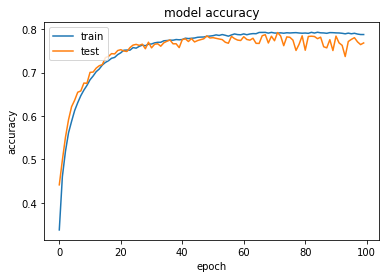

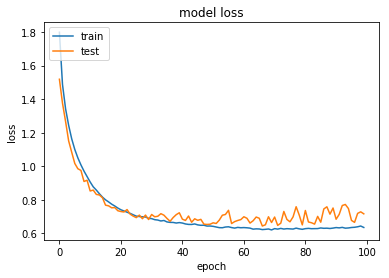

In [7]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 2E - Qualitative Evaluation
Re-do the qualitative evaluation from part 1 using this more advanced model.

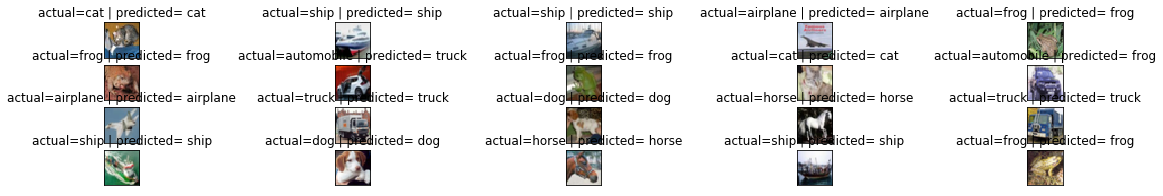

In [9]:
import numpy as np
import matplotlib.pyplot as plt
num_classes = 10
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(20,3))
for i in range(20):
    ax = fig.add_subplot(4, 5, 1 + i, xticks=[], yticks=[])
    index = np.argmax(y_test[i])
    predicted_label  = model.predict(x_test)[i]
    predicted_class = class_names[np.argmax(predicted_label)]
    ax.set_title("actual="+class_names[index]+" | predicted= "+predicted_class)
    plt.imshow(x_test[i],interpolation='nearest')
plt.show()

# 2F - Report
Write a few sentence summary of your work on part 2. Focus on the differences from part 1.

The summary should at least answer the following questions:
1. What task were you trying to solve?
2. How did you implement it.
3. How did it perform? Can you interpret the performance metrics in plain english? Did it do well? Overfit? Underfit?
4. Cite any resources/tutorials you used (informally, just a URL is ok). Citing papers isn't necessary.
5. This is meant to be a very simple summary (like the 'abstract' of a paper). No diagrams/etc necessary.

You can do some basic formatting with markdown if you'd like.


Solutions for all questions
------------------------------

Answer 1
-----------

The task I am trying to accomplish is to recognize objects in the image. I am using a convolutional neural network to perform classification on CIFAR-10 Dataset.

Answer 2
-----------

I am using Keras framework to build my neural network. The neural network has the following
architecture.

Layer (type)                 Output Shape              Param #   
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
activation_4 (Activation)    (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1180160   
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_6 (Activation)    (None, 10)               0



Object Recogniton Pipeline

Training
----------

The CIFAR 10 dataset is of size 32*32 (RGB). The dataset is already preprocessed. This input dimension is fed into the neural network. Training of the neural network happens with the follwing  hyperparameters.

Hyperparameters : Epochs = 100,  Optimizer = Adam, Loss = Categorical cross entropy

Inference
-----------

Model.predict function helps us in making the prediction given an image. The model will generate values for each class and the index with highest probability is used to get the label.


Answer3: 
----------

The model did perform well , from the graph we can see that the model is not overfitting or underfitting.

Here are the metrics on the test data :

Test loss: 0.7158443852424622
Test accuracy: 0.7684

We can observe that by using a CNN we could bring down the loss by a great value compared to a normal ANN.

If we use more deeper network with more convolutional layers, we can achieve better result compared to this.
